In [1]:
import numpy as np 
import pandas as pd 
import seaborn  as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("/home/jdiego/Documentos/MACHINE_LEARNING_DATA_SCIENCE/UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv")

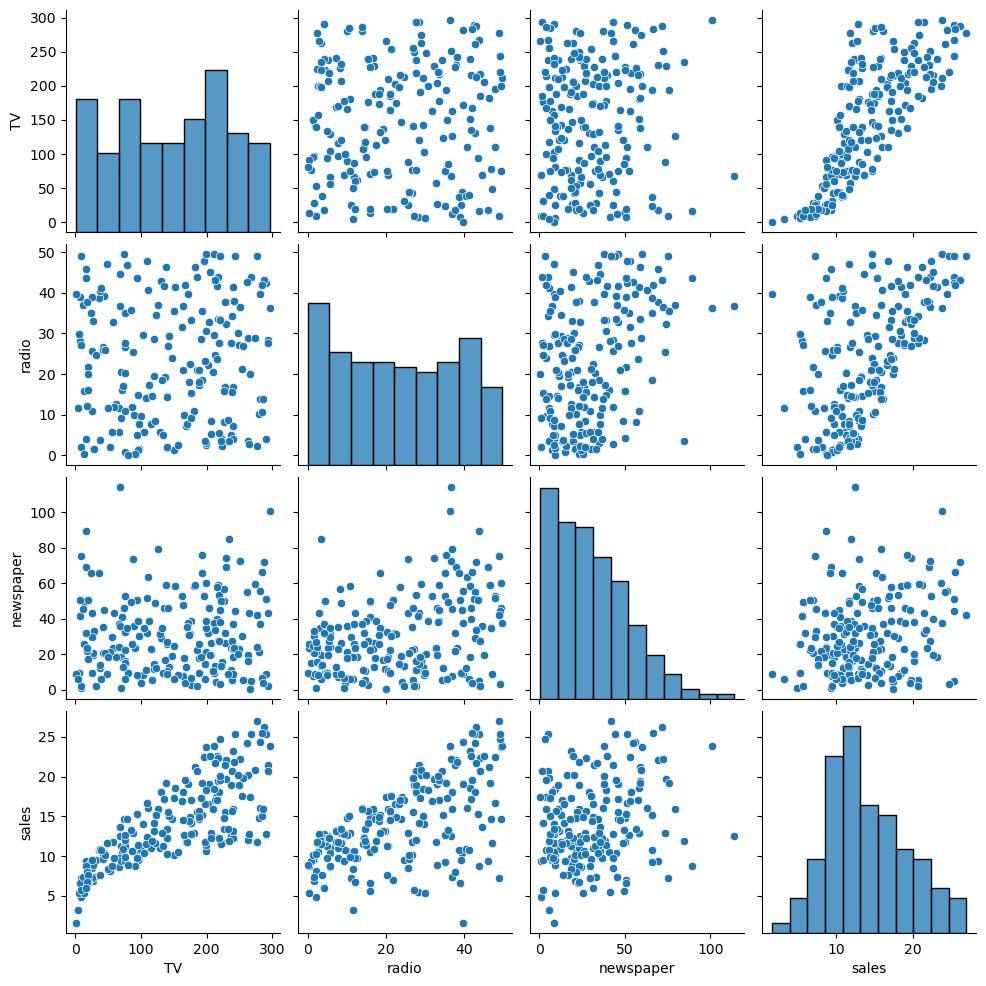

In [3]:

sns.pairplot(df)

In [4]:
# lets divide into features  
X = df.drop("sales" , axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [5]:
y = df["sales"]

In [6]:
# lets separate into the training sets 
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [8]:
# importing the stimator
from sklearn.linear_model import LinearRegression 

In [9]:
MyModel = LinearRegression()

In [10]:
MyModel.fit(X_train , y_train)

LinearRegression()

In [11]:
test_predictions = MyModel.predict(X_test)

In [12]:
# lets check how the model did it 

from sklearn.metrics import mean_absolute_error , mean_squared_error 

In [13]:
# check the original mean 
df["sales"].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

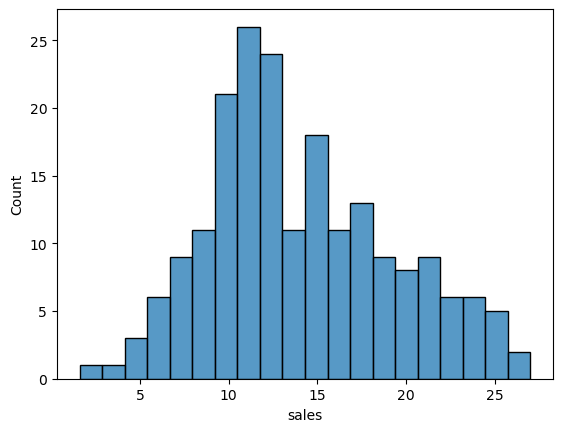

In [14]:
sns.histplot(df , x="sales" , bins=20)

In [15]:
mean_absolute_error(y_test , test_predictions)

1.4937750024728966

In [16]:
np.sqrt(mean_squared_error(y_test , test_predictions))

1.9307843822347195

In [17]:
# lets check out if the data was valid for a linear regression 

test_residuals = y_test - test_predictions 


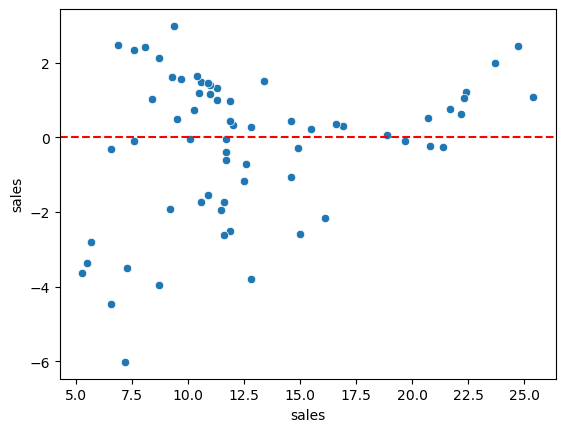

In [18]:
sns.scatterplot(x=y_test , y= test_residuals)
plt.axhline(y=0 , color="red" , ls="--")

<Axes: xlabel='sales', ylabel='Count'>

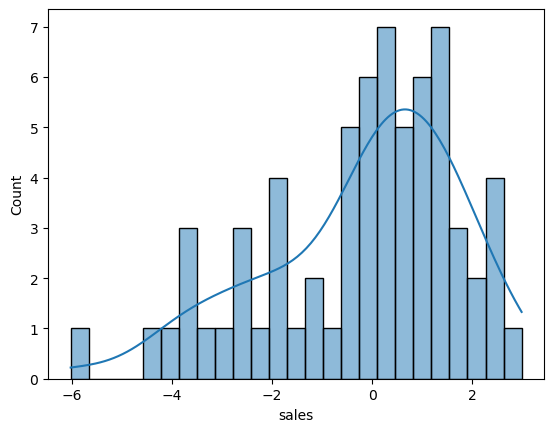

In [19]:
sns.histplot(test_residuals, bins=25, kde=True)

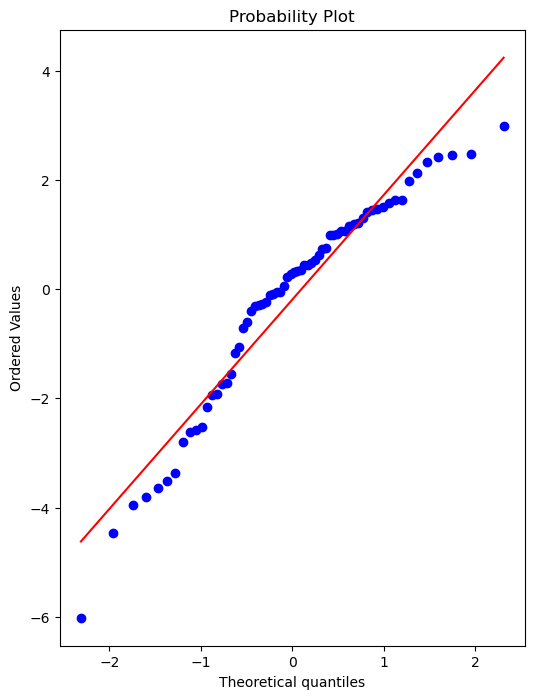

In [20]:
import scipy  as sp 

fig , ax = plt.subplots(figsize=(6,8) , dpi=100)

_=sp.stats.probplot(test_residuals, plot=ax)

In [21]:
#  deploy the model 

final_model = LinearRegression()

final_model.fit(X,y)

LinearRegression()

In [22]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [23]:
y_hat = final_model.predict(X)

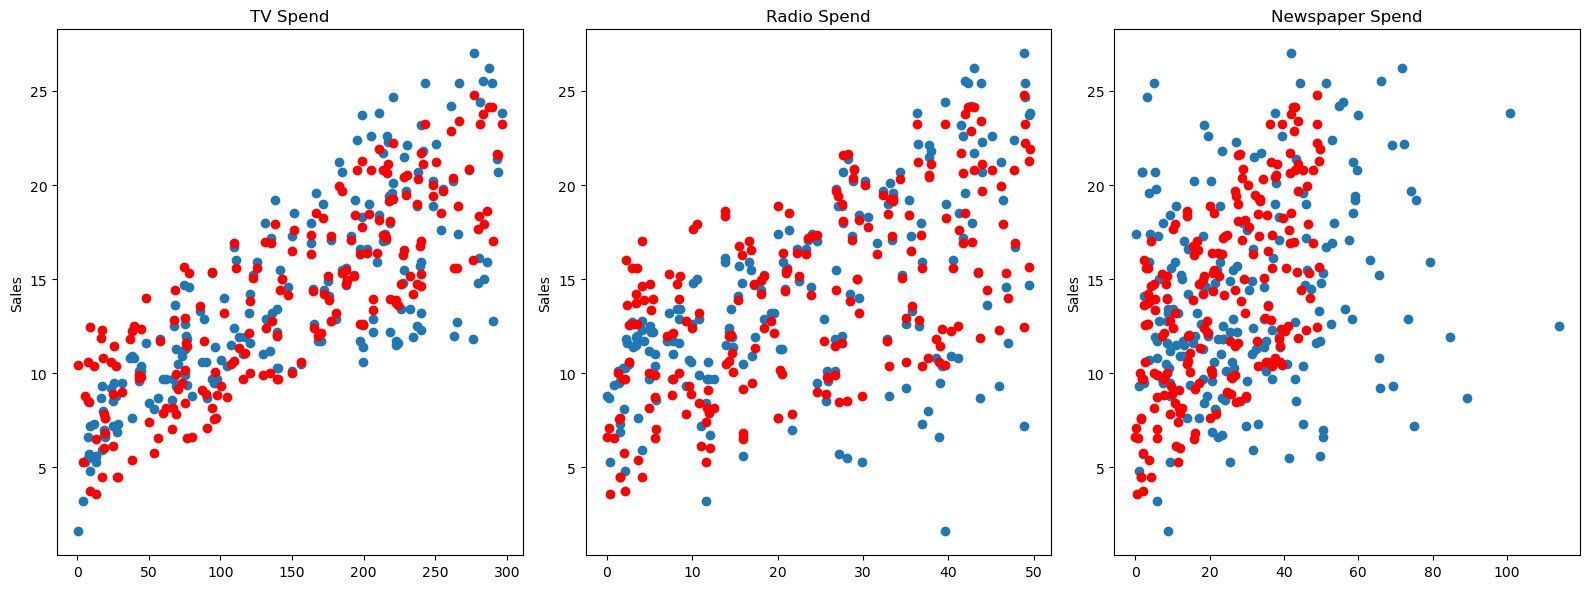

In [24]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [25]:
# save and load the model

from joblib import dump , load 

In [26]:
# deplot the model 
dump(final_model, "final_sales_model.joblib")

['final_sales_model.joblib']

In [27]:
# load the model

loaded_model = load("final_sales_model.joblib")

loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [28]:
# test model with new data 

camp = [[ 149 , 22, 12 ]]

loaded_model.predict(camp)

/home/jdiego/anaconda3/envs/tesis/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])